THE INITIAL CODE CELL IS USED TO IMPORT THE NECESSARY LIBRARIES AND TO ESTABLISH A CONNECTION WITH A MONGO DB DATABASE.

In [70]:
import pymongo
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import geopandas as gpd
import plotly.express as px
import warnings

warnings.filterwarnings("ignore")

#Create the connection with the date base
def create_connection():
    try:
        client = pymongo.MongoClient("mongodb://localhost:27017/")
        return client["IUM-Calcio"], client # Change the database name for your name
    except pymongo.errors.ConnectionFailure as e:
        print(f"Connection failed: {e}")
        return None, None

#Close the connection with the database
def close_connection(client):
    # Close connection
    if client is not None:  # Check for None explicitly
        client.close()

db, client = create_connection()

CREATION OF THE DATAFRAMES FOR EACH COLLECTION OF MONGODB

In [71]:
def getGames(db):
    try:
        collection = db["games"]
        games = list(collection.find())
        return games
    except Exception as e:
            print(f"Retrieval of Games failed: {e}")
            return []

gamesInfo = getGames(db)   
games_df = pd.DataFrame(gamesInfo)
games_df

,_id,game_id,competition_id,season,round,date,home_club_id,away_club_id,home_club_goals,away_club_goals,...,stadium,attendance,referee,url,home_club_name,away_club_name,aggregate,competition_type,home_club_formation,away_club_formation
0,65944f08b6c1148df9b5a41b,2222597,RU1,2012,6. Matchday,2012-08-25,3725,232,2,1,...,Akhmat-Arena,21700.0,Vladislav Bezborodov,https://www.transfermarkt.co.uk/terek-grozny_s...,RFK Akhmat Grozny,FK Spartak Moskva,2:1,domestic_league,NaN,NaN
1,65944f08b6c1148df9b5a41c,2222627,RU1,2012,5. Matchday,2012-08-20,2696,4128,0,2,...,Metallurg,11400.0,Sergey Ivanov,https://www.transfermarkt.co.uk/krylya-sovetov...,PFK Krylya Sovetov Samara,Amkar Perm,0:2,domestic_league,NaN,NaN
2,65944f08b6c1148df9b5a41d,2222658,RU1,2012,10. Matchday,2012-09-30,2410,121,0,2,...,Arena Khimki,12000.0,Sergey Karasev,https://www.transfermarkt.co.uk/cska-moscow_di...,PFK CSKA Moskva,FK Dinamo Moskva,0:2,domestic_league,NaN,NaN
3,65944f08b6c1148df9b5a41e,2222664,RU1,2012,8. Matchday,2012-09-15,932,2698,1,0,...,RZD Arena,11408.0,Sergey Karasev,https://www.transfermarkt.co.uk/lokomotiv-mosc...,"Футбольный клуб ""Локомотив"" Москва",FC Rubin Kazan,1:0,domestic_league,NaN,NaN
4,65944f08b6c1148df9b5a41f,2222683,RU1,2012,12. Matchday,2012-10-22,2696,12438,0,1,...,Metallurg,7534.0,Timur Arslanbekov,https://www.transfermarkt.co.uk/krylya-sovetov...,PFK Krylya Sovetov Samara,Volga Nizhniy Novgorod (- 2016),0:1,domestic_league,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
65211,65944f0fb6c1148df9b6a2d8,2367292,EL,2013,Group B,2013-11-07,383,419,2,0,...,Philips Stadion,10000.0,Cristian Balaj,https://www.transfermarkt.co.uk/spielbericht/i...,Eindhovense Voetbalvereniging Philips Sport Ve...,NaN,2:0,international_cup,NaN,NaN
65212,65944f0fb6c1148df9b6a2d9,2629035,NLP,2015,Third Round,2015-10-27,383,16866,6,0,...,Philips Stadion,31000.0,Allard Lindhout,https://www.transfermarkt.co.uk/spielbericht/i...,Eindhovense Voetbalvereniging Philips Sport Ve...,NaN,6:0,domestic_cup,NaN,NaN
65213,65944f0fb6c1148df9b6a2da,3092951,CLQ,2018,Qualifying Round 2nd leg,2018-08-29,383,713,3,0,...,Philips Stadion,34200.0,Anthony Taylor,https://www.transfermarkt.co.uk/spielbericht/i...,Eindhovense Voetbalvereniging Philips Sport Ve...,NaN,3:0,international_cup,NaN,NaN
65214,65944f0fb6c1148df9b6a2db,4164101,CGB,2023,Second Round,2023-08-29,512,1194,6,1,...,bet365 Stadium,9410.0,Michael Salisbury,https://www.transfermarkt.co.uk/spielbericht/i...,Stoke City,NaN,6:1,other,4-2-3-1,4-2-3-1


In [72]:
def getClubs(db):
    try:
        collection = db["clubs"]
        clubs = list(collection.find())
        return clubs
    except Exception as e:
            print(f"Retrieval of Clubs failed: {e}")
            return []
    
clubsInfo = getClubs(db)
clubs_df = pd.DataFrame(clubsInfo)
clubs_df

,_id,club_id,club_code,name,domestic_competition_id,squad_size,average_age,foreigners_number,foreigners_percentage,national_team_players,stadium_name,stadium_seats,net_transfer_record,last_season,url
0,65944d8cb6c1148df990a787,105,sv-darmstadt-98,Sportverein Darmstadt 1898 e. V.,L1,30,26.4,11,36.7,1,Merck-Stadion am Böllenfalltor,17810,€-1.60m,2023,https://www.transfermarkt.co.uk/sv-darmstadt-9...
1,65944d8cb6c1148df990a788,11127,ural-ekaterinburg,FK Ural Yekaterinburg,RU1,25,28.2,13,52.0,5,Yekaterinburg Arena,23000,€-770k,2023,https://www.transfermarkt.co.uk/ural-ekaterinb...
2,65944d8cb6c1148df990a789,114,besiktas-istanbul,Beşiktaş Jimnastik Kulübü,TR1,32,27.4,16,50.0,13,Tüpraş Stadyumu,42590,€-14.50m,2023,https://www.transfermarkt.co.uk/besiktas-istan...
3,65944d8cb6c1148df990a78a,12,as-rom,Associazione Sportiva Roma,IT1,26,27.4,17,65.4,17,Olimpico di Roma,73261,+€65.20m,2023,https://www.transfermarkt.co.uk/as-rom/startse...
4,65944d8cb6c1148df990a78b,148,tottenham-hotspur,Tottenham Hotspur Football Club,GB1,29,26.2,21,72.4,22,Tottenham Hotspur Stadium,62062,€-130.40m,2023,https://www.transfermarkt.co.uk/tottenham-hots...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
421,65944d8cb6c1148df990a92c,68608,cf-os-belenenses,CF Os Belenenses,PO1,30,25.7,5,16.7,0,Estádio do Restelo,19980,+-0,2017,https://www.transfermarkt.co.uk/cf-os-belenens...
422,65944d8cb6c1148df990a92d,724,fc-volendam,Football Club Volendam,NL1,29,22.8,14,48.3,3,Kras Stadion,7384,+€1.80m,2023,https://www.transfermarkt.co.uk/fc-volendam/st...
423,65944d8cb6c1148df990a92e,800,atalanta-bergamo,Atalanta Bergamasca Calcio S.p.a.,IT1,25,27.2,17,68.0,15,Gewiss Stadium,21747,+€87.00m,2023,https://www.transfermarkt.co.uk/atalanta-berga...
424,65944d8cb6c1148df990a92f,979,moreirense-fc,Moreirense Futebol Clube,PO1,26,26.0,17,65.4,2,Estádio C. J. de Almeida Freitas,6153,€-2.05m,2023,https://www.transfermarkt.co.uk/moreirense-fc/...


In [73]:
#appearances
def getAppearances(db):
    try:
        collection = db["appearances"]
        appearances = list(collection.find())
        return appearances
    except Exception as e:
            print(f"Retrieval of Apparances failed: {e}")
            return []

AppearancesInfo = getAppearances(db)   
appearances_df = pd.DataFrame(AppearancesInfo)
appearances_df

,_id,appearance_id,game_id,player_id,player_club_id,player_current_club_id,date,player_name,competition_id,yellow_cards,red_cards,goals,assists,minutes_played
0,65944dbeb6c1148df992a6b3,2231978_38004,2231978,38004,853,235,2012-07-03,Aurélien Joachim,CLQ,0,0,2,0,90
1,65944dbeb6c1148df992a6b4,2233748_79232,2233748,79232,8841,2698,2012-07-05,Ruslan Abyshov,ELQ,0,0,0,0,90
2,65944dbeb6c1148df992a6b5,2234413_42792,2234413,42792,6251,465,2012-07-05,Sander Puri,ELQ,0,0,0,0,45
3,65944dbeb6c1148df992a6b6,2234418_73333,2234418,73333,1274,6646,2012-07-05,Vegar Hedenstad,ELQ,0,0,0,0,90
4,65944dbeb6c1148df992a6b7,2234421_122011,2234421,122011,195,3008,2012-07-05,Markus Henriksen,ELQ,0,0,0,1,90
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1507346,65944e7cb6c1148df9a9a6cb,4172154_659813,4172154,659813,15,15,2023-11-30,Piero Hincapié,EL,0,0,0,0,90
1507347,65944e7cb6c1148df9a9a6cc,4172154_696027,4172154,696027,15,15,2023-11-30,Ayman Aourir,EL,0,0,0,0,2
1507348,65944e7cb6c1148df9a9a6cd,4172154_7161,4172154,7161,15,15,2023-11-30,Jonas Hofmann,EL,0,0,0,0,10
1507349,65944e7cb6c1148df9a9a6ce,4172154_743395,4172154,743395,15,15,2023-11-30,Noah Mbamba,EL,0,0,0,0,45


In [74]:
#club_games
def getClubGames(db):
    try: 
        collection = db["club_games"]
        club_games = list(collection.find())
        return club_games
    except Exception as e:
            print(f"Retrieval of ClubGames failed: {e}")
            return []
    
ClubGamesInfo = getClubGames(db)
club_games_df = pd.DataFrame(ClubGamesInfo)
club_games_df

,_id,game_id,club_id,own_goals,own_manager_name,opponent_id,opponent_goals,opponent_manager_name,hosting,is_win,own_position,opponent_position
0,65944d9ab6c1148df990a932,2221751,431,1,Lutz Göttling,60,2,Christian Streich,Home,0,NaN,NaN
1,65944d9ab6c1148df990a933,2221755,83,3,Ralph Hasenhüttl,4795,0,Tomas Oral,Home,1,NaN,NaN
2,65944d9ab6c1148df990a934,2222597,3725,2,Stanislav Cherchesov,232,1,Unai Emery,Home,1,2.0,5.0
3,65944d9ab6c1148df990a935,2222627,2696,0,Andrey Kobelev,4128,2,Rustem Khuzin,Home,0,11.0,10.0
4,65944d9ab6c1148df990a936,2222658,2410,0,Leonid Slutski,121,2,Dan Petrescu,Home,0,2.0,13.0
...,...,...,...,...,...,...,...,...,...,...,...,...
130427,65944da6b6c1148df992a6ae,4126931,20923,2,Sergey Perednya,12065,1,Aleksandr Gorbachev,Away,1,NaN,NaN
130428,65944da6b6c1148df992a6af,4148237,920,0,Ruaidhri Higgins,10481,1,Milic Curcic,Away,0,NaN,NaN
130429,65944da6b6c1148df992a6b0,4171268,681,2,Imanol Alguacil,409,0,Gerhard Struber,Away,1,NaN,NaN
130430,65944da6b6c1148df992a6b1,4148252,144,3,Sergej Jakirovic,10532,1,Dan Brimsvík,Away,1,NaN,NaN


In [75]:
#players
def getPlayers(db):
    try: 
        collection = db["players"]
        players = list(collection.find())
        return players
    except Exception as e:
            print(f"Retrieval of Players failed: {e}")
            return []
    
PlayersInfo = getPlayers(db)
players_df = pd.DataFrame(PlayersInfo)
players_df

,_id,player_id,first_name,last_name,name,last_season,current_club_id,player_code,country_of_birth,city_of_birth,...,highest_market_value_in_eur,image_url,url,current_club_domestic_competition_id,current_club_name,agent_name,foot,height_in_cm,market_value_in_eur,contract_expiration_date
0,65944f3fb6c1148df9bd5c36,598,Timo,Hildebrand,Timo Hildebrand,2014,24,timo-hildebrand,Germany,Worms,...,10000000.0,https://img.a.transfermarkt.technology/portrai...,https://www.transfermarkt.co.uk/timo-hildebran...,L1,Eintracht Frankfurt,NaN,NaN,NaN,NaN,NaN
1,65944f3fb6c1148df9bd5c37,670,Martin,Petrov,Martin Petrov,2012,714,martin-petrov,Bulgaria,Vratsa,...,12000000.0,https://img.a.transfermarkt.technology/portrai...,https://www.transfermarkt.co.uk/martin-petrov/...,ES1,RCD Espanyol Barcelona,IFM,NaN,NaN,NaN,NaN
2,65944f3fb6c1148df9bd5c38,1323,Martin,Amedick,Martin Amedick,2012,24,martin-amedick,Germany,Paderborn,...,2750000.0,https://img.a.transfermarkt.technology/portrai...,https://www.transfermarkt.co.uk/martin-amedick...,L1,Eintracht Frankfurt,NaN,NaN,NaN,NaN,NaN
3,65944f3fb6c1148df9bd5c39,3195,Jermaine,Pennant,Jermaine Pennant,2013,512,jermaine-pennant,England,Nottingham,...,10500000.0,https://img.a.transfermarkt.technology/portrai...,https://www.transfermarkt.co.uk/jermaine-penna...,GB1,Stoke City,Andrew Sky,right,173.0,NaN,NaN
4,65944f3fb6c1148df9bd5c3a,3259,Damien,Duff,Damien Duff,2013,931,damien-duff,Ireland,Ballyboden,...,17000000.0,https://img.a.transfermarkt.technology/portrai...,https://www.transfermarkt.co.uk/damien-duff/pr...,GB1,Fulham FC,NaN,left,177.0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30297,65944f42b6c1148df9bdd28f,371851,Jaka,Bijol,Jaka Bijol,2023,410,jaka-bijol,Slovenia,Vuzenica,...,10000000.0,https://img.a.transfermarkt.technology/portrai...,https://www.transfermarkt.co.uk/jaka-bijol/pro...,IT1,Udinese Calcio,MSC GROUP,right,190.0,10000000.0,2027-06-30 00:00:00
30298,65944f42b6c1148df9bdd290,537171,Semuel,Pizzignacco,Semuel Pizzignacco,2018,410,semuel-pizzignacco,Italy,Monfalcone,...,350000.0,https://img.a.transfermarkt.technology/portrai...,https://www.transfermarkt.co.uk/semuel-pizzign...,IT1,Udinese Calcio,NaN,right,188.0,325000.0,2025-06-30 00:00:00
30299,65944f42b6c1148df9bdd291,586756,Festy,Ebosele,Festy Ebosele,2023,410,festy-ebosele,Ireland,"Enniscorthy, Wexford",...,4500000.0,https://img.a.transfermarkt.technology/portrai...,https://www.transfermarkt.co.uk/festy-ebosele/...,IT1,Udinese Calcio,The Kulture Group,right,180.0,4500000.0,2027-06-30 00:00:00
30300,65944f42b6c1148df9bdd292,704692,Nicolò,Cocetta,Nicolò Cocetta,2022,410,nicolo-cocetta,Italy,San Daniele del Friuli,...,75000.0,https://img.a.transfermarkt.technology/portrai...,https://www.transfermarkt.co.uk/nicolo-cocetta...,IT1,Udinese Calcio,NaN,NaN,NaN,75000.0,2023-06-30 00:00:00


In [76]:
#player_valuations
def getPlayerValuations(db):
    try: 
        collection = db["player_valuations"]
        player_valuations = list(collection.find())
        return player_valuations
    except Exception as e:
            print(f"Retrieval of Player Valuations failed: {e}")
            return []
    
PlayerValsInfo = getPlayerValuations(db)
player_valuations_df = pd.DataFrame(PlayerValsInfo)
player_valuations_df

,_id,player_id,last_season,datetime,date,dateweek,market_value_in_eur,n,current_club_id,player_club_domestic_competition_id
0,65944f19b6c1148df9b6a2de,3132,2013,2003-12-09 00:00:00,2003-12-09,2003-12-08,400000,1,126,TR1
1,65944f19b6c1148df9b6a2df,6893,2012,2003-12-15 00:00:00,2003-12-15,2003-12-15,900000,1,984,GB1
2,65944f19b6c1148df9b6a2e0,10,2015,2004-10-04 00:00:00,2004-10-04,2004-10-04,7000000,1,398,IT1
3,65944f19b6c1148df9b6a2e1,26,2017,2004-10-04 00:00:00,2004-10-04,2004-10-04,1500000,1,16,L1
4,65944f19b6c1148df9b6a2e2,65,2015,2004-10-04 00:00:00,2004-10-04,2004-10-04,8000000,1,1091,GR1
...,...,...,...,...,...,...,...,...,...,...
440658,65944f39b6c1148df9bd5c31,950091,2023,2023-09-21 00:00:00,2023-09-21,2023-09-18,1000000,1,1091,GR1
440659,65944f39b6c1148df9bd5c32,968903,2023,2023-09-21 00:00:00,2023-09-21,2023-09-18,50000,1,653,GR1
440660,65944f39b6c1148df9bd5c33,1031590,2023,2023-09-21 00:00:00,2023-09-21,2023-09-18,50000,1,6418,GR1
440661,65944f39b6c1148df9bd5c34,1166093,2023,2023-09-21 00:00:00,2023-09-21,2023-09-18,50000,1,30120,GR1


In [77]:
#game_events
def getGameEvents(db):
    try: 
        collection = db["game_events"]
        game_events = list(collection.find())
        return game_events
    except Exception as e:
            print(f"Retrieval of Game Events failed: {e}")
            return []

GameEvents = getGameEvents(db)
game_events_df = pd.DataFrame(GameEvents)
game_events_df

,_id,game_event_id,date,game_id,minute,type,club_id,player_id,description,player_assist_id,player_in_id
0,65944ec2b6c1148df9a9a6fe,2f41da30c471492e7d4a984951671677,2012-08-05,2211607,77,Cards,610,4425,"1. Yellow card , Mass confrontation",NaN,NaN
1,65944ec2b6c1148df9a9a6ff,a72f7186d132775f234d3e2f7bc0ed5b,2012-08-05,2211607,77,Cards,383,33210,"1. Yellow card , Mass confrontation",NaN,NaN
2,65944ec2b6c1148df9a9a700,b2d721eaed4692a5c59a92323689ef18,2012-08-05,2211607,3,Goals,383,36500,", Header, 1. Tournament Goal Assist: , Corner,...",56416.0,NaN
3,65944ec2b6c1148df9a9a701,aef768899cedac0c9a650980219075a2,2012-08-05,2211607,53,Goals,383,36500,", Right-footed shot, 2. Tournament Goal Assist...",146258.0,NaN
4,65944ec2b6c1148df9a9a702,5d6d9533023057b6619ecd145a038bbe,2012-08-05,2211607,74,Substitutions,383,36500,", Not reported",NaN,49499.0
...,...,...,...,...,...,...,...,...,...,...,...
666553,65944ee4b6c1148df9b3d2b7,7f5a6b61ca858e0cd63a58c554b56bb7,2023-11-15,4228114,82,Substitutions,358,874064,", Tactical",NaN,965607.0
666554,65944ee4b6c1148df9b3d2b8,5b93d1bc9e8bf42965682d491e1dd6c7,2023-11-15,4228114,44,Goals,46889,922572,", Penalty, 1. Tournament Goal",NaN,NaN
666555,65944ee4b6c1148df9b3d2b9,d638b1e72f531c413487d413258a3130,2023-11-15,4228114,68,Substitutions,46889,922572,", Tactical",NaN,1200869.0
666556,65944ee4b6c1148df9b3d2ba,0ff7774aa1383af83e40c435325463af,2023-11-15,4228114,68,Substitutions,46889,1200864,", Tactical",NaN,921121.0


In [78]:
#game_lineups
def getGameLineUps(db):
    try: 
        collection = db["game_lineups"]
        game_lineups = list(collection.find())
        return game_lineups
    except Exception as e:
            print(f"Retrieval of Game Line Ups failed: {e}")
            return []
    
GameLineupsInfo = getGameLineUps(db)
game_lineups_df = pd.DataFrame(GameLineupsInfo)
game_lineups_df

,_id,game_lineups_id,game_id,club_id,type,number,player_id,player_name,team_captain,position
0,65944ef9b6c1148df9b3d2bd,77b0f371923e0c8bdf050a1e269faaac,3606208,338,starting_lineup,89,419061,Vladyslav Supryaga,0,Centre-Forward
1,65944ef9b6c1148df9b3d2be,cb6eeedb9f728570615d37b6fe7facaf,3606208,338,starting_lineup,10,368611,Mykola Shaparenko,0,Central Midfield
2,65944ef9b6c1148df9b3d2bf,8e63d5f47aac2bdb0e54f5481986e104,3606208,338,starting_lineup,5,124182,Sergiy Sydorchuk,1,Defensive Midfield
3,65944ef9b6c1148df9b3d2c0,ea4a96d8be410f2d646cf095c4faae7f,3606208,338,starting_lineup,94,181118,Tomasz Kedziora,0,Right-Back
4,65944ef9b6c1148df9b3d2c1,e6abe553801b09bc623c3deb96acba17,3606208,338,starting_lineup,16,404842,Vitaliy Mykolenko,0,Left-Back
...,...,...,...,...,...,...,...,...,...,...
119128,65944f03b6c1148df9b5a416,f4e6a6b2e3d24d12290c6ce4168e1bdb,4228114,46889,substitutes,3,1200869,Thomas Chambers,0,Left-Back
119129,65944f03b6c1148df9b5a417,7a78814a66c59c79e8d40c8669a67d3f,4228114,46889,substitutes,5,1203716,Mohammed-Idris Oshilaja,0,Defender
119130,65944f03b6c1148df9b5a418,09cc07767ce441b4de4a76c102fd17d5,4228114,46889,substitutes,13,1200870,Max Ovenden,0,Goalkeeper
119131,65944f03b6c1148df9b5a419,3c259f1849421af021aba3e84a4da8de,4228114,46889,substitutes,12,550816,Julien Anau,0,Attacking Midfield


In [79]:
#competitions
def getCompetitions(db):
    try: 
        collection = db["competitions"]
        competitions = list(collection.find())
        return competitions
    except Exception as e:
            print(f"Retrieval of Competitions failed: {e}")
            return []
    
CompetitionsInfo = getCompetitions(db)
competitions_df = pd.DataFrame(CompetitionsInfo)
competitions_df

,_id,competition_id,competition_code,name,sub_type,type,country_id,country_name,domestic_league_code,confederation,url
0,65944ea7b6c1148df9a9a6d2,CIT,italy-cup,italy-cup,domestic_cup,domestic_cup,75,Italy,IT1,europa,https://www.transfermarkt.co.uk/italy-cup/star...
1,65944ea7b6c1148df9a9a6d3,NLSC,johan-cruijff-schaal,johan-cruijff-schaal,domestic_super_cup,other,122,Netherlands,NL1,europa,https://www.transfermarkt.co.uk/johan-cruijff-...
2,65944ea7b6c1148df9a9a6d4,GRP,kypello-elladas,kypello-elladas,domestic_cup,domestic_cup,56,Greece,GR1,europa,https://www.transfermarkt.co.uk/kypello-ellada...
3,65944ea7b6c1148df9a9a6d5,POSU,supertaca-candido-de-oliveira,supertaca-candido-de-oliveira,domestic_super_cup,other,136,Portugal,PO1,europa,https://www.transfermarkt.co.uk/supertaca-cand...
4,65944ea7b6c1148df9a9a6d6,RUSS,russian-super-cup,russian-super-cup,domestic_super_cup,other,141,Russia,RU1,europa,https://www.transfermarkt.co.uk/russian-super-...
5,65944ea7b6c1148df9a9a6d7,SUC,supercopa,supercopa,domestic_super_cup,other,157,Spain,ES1,europa,https://www.transfermarkt.co.uk/supercopa/star...
6,65944ea7b6c1148df9a9a6d8,USC,uefa-super-cup,uefa-super-cup,uefa_super_cup,other,-1,NaN,NaN,europa,https://www.transfermarkt.co.uk/uefa-super-cup...
7,65944ea7b6c1148df9a9a6d9,DK1,superligaen,superligaen,first_tier,domestic_league,39,Denmark,DK1,europa,https://www.transfermarkt.co.uk/superligaen/st...
8,65944ea7b6c1148df9a9a6da,EL,europa-league,europa-league,europa_league,international_cup,-1,NaN,NaN,europa,https://www.transfermarkt.co.uk/europa-league/...
9,65944ea7b6c1148df9a9a6db,ES1,laliga,laliga,first_tier,domestic_league,157,Spain,ES1,europa,https://www.transfermarkt.co.uk/laliga/startse...


1.AVERAGE AGE OF THE TEAMS OF A CERTAIN COUNTRY

Data cleaning: What we do in the next cell is to get from the DataFrame of the clubs collection the columns whose information is the one we need for this particular case (club_code, average_age, and the domestic competition to select the country that we want to see). That information is stored in a new dataFrame 'dfClubAverage'. The final dataFrame which we'll use to draw the plot is called 'dfItaly', and it is a result of specifying 'IT1' (Italy) as the competition that we want from 'dfClubAverage'.

In [80]:
clubs_df.set_index('club_id')
dfClubAverage = clubs_df[['club_code', 'average_age','domestic_competition_id']]
dfItaly = dfClubAverage[dfClubAverage['domestic_competition_id'] == 'IT1']
dfItaly

,club_code,average_age,domestic_competition_id
3,as-rom,27.4,IT1
32,fc-bologna,25.3,IT1
47,udinese-calcio,25.1,IT1
78,palermo-fc,25.6,IT1
79,inter-mailand,29.0,IT1
100,spezia-calcio,24.4,IT1
111,ssc-neapel,26.5,IT1
116,parma-calcio-1913,24.9,IT1
117,cesena-fc,26.0,IT1
123,spal,26.0,IT1


Plotting the data in a bar plot using the last dataFrame obtained, 'dfItaly':

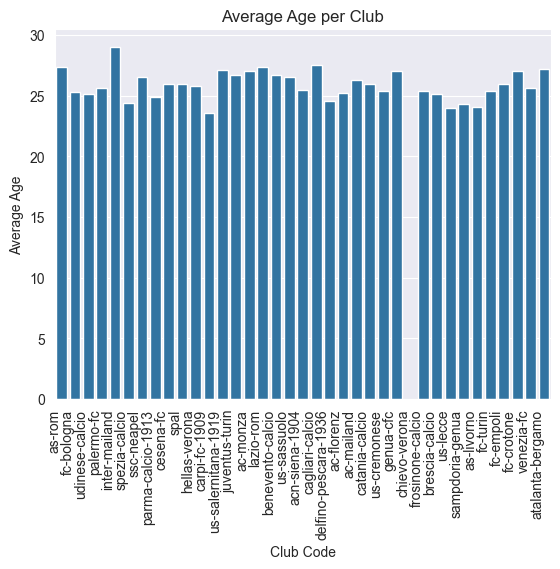

<Figure size 1500x800 with 0 Axes>

In [81]:
sns.barplot(x='club_code', y='average_age', data=dfItaly)
plt.title('Average Age per Club')
plt.xlabel('Club Code')
plt.ylabel('Average Age')
plt.xticks(rotation=90, ha="right")
plt.figure(figsize=(15, 8))
plt.show()

2. FOR A GIVEN TEAM THEIR GOALS AT HOME AND AWAY DURING A YEAR

Data cleaning: We select from the games' dataframe the columns that we need, and also the club from the one we want to see the stats and the season. In this first case we will see the stats of the team when playing AT HOME.

In [82]:
dfGamesHomeGoals = games_df[['season', 'home_club_name', 'home_club_goals', 'away_club_goals']]
dfRealMadridHome = dfGamesHomeGoals[(dfGamesHomeGoals['home_club_name'] == 'Real Madrid Club de Fútbol') & (dfGamesHomeGoals['season'] == 2012)]
dfRealMadridHome

,season,home_club_name,home_club_goals,away_club_goals
1374,2012,Real Madrid Club de Fútbol,2,0
5124,2012,Real Madrid Club de Fútbol,5,1
5136,2012,Real Madrid Club de Fútbol,3,2
5143,2012,Real Madrid Club de Fútbol,4,0
7140,2012,Real Madrid Club de Fútbol,5,1
10875,2012,Real Madrid Club de Fútbol,6,2
12621,2012,Real Madrid Club de Fútbol,2,2
12623,2012,Real Madrid Club de Fútbol,1,1
12625,2012,Real Madrid Club de Fútbol,2,0
18335,2012,Real Madrid Club de Fútbol,4,0


What we do in the next cell is to modify the information to obtain a new dataFrame of only 1 row, in which we maintain the columns season and club from the previous dataFrame. Instead, the new columns 'Total_Goal_Home' and 'Total_Goal_Away' are a sum of the columns 'home_club_goals' and 'away_club_goals' from the previous dataFrame. As the team is now playing at home, 'Total_Goal_Home' will be the goals in favour and 'Total_Goal_Away' the goals received.

In [83]:
total_home_goals = pd.DataFrame(
    {'Season': [dfRealMadridHome['season'].iloc[0]], 'Team': [dfRealMadridHome['home_club_name'].iloc[0]], 'Total_Goal_Home': [dfRealMadridHome['home_club_goals'].sum()],
     'Total_Goal_Away': [dfRealMadridHome['away_club_goals'].sum()]})
total_home_goals

,Season,Team,Total_Goal_Home,Total_Goal_Away
0,2012,Real Madrid Club de Fútbol,94,29


We now draw the plot from the last dataFrame:

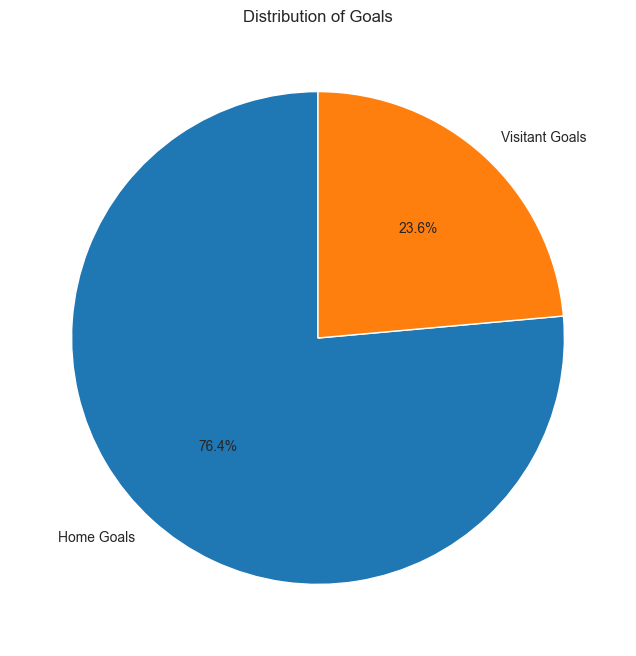

In [84]:
plt.figure(figsize=(8, 8))
plt.pie([total_home_goals['Total_Goal_Home'].values[0], total_home_goals['Total_Goal_Away'].values[0]], labels=['Home Goals', 'Visitant Goals'], autopct='%1.1f%%', startangle=90)
plt.title('Distribution of Goals')
plt.show()

Now, we're going to do the same that has been done in the previous cells, but now the team selected will be playing AWAY.

In [85]:
dfGamesAwayGoals = games_df[['season', 'away_club_name', 'home_club_goals', 'away_club_goals']]
dfRealMadridAway = dfGamesAwayGoals[(dfGamesAwayGoals['away_club_name'] == 'Real Madrid Club de Fútbol') & (dfGamesAwayGoals['season'] == 2012)]
dfRealMadridAway

,season,away_club_name,home_club_goals,away_club_goals
1183,2012,Real Madrid Club de Fútbol,3,2
1184,2012,Real Madrid Club de Fútbol,4,1
4851,2012,Real Madrid Club de Fútbol,1,2
6945,2012,Real Madrid Club de Fútbol,1,2
6946,2012,Real Madrid Club de Fútbol,2,3
10659,2012,Real Madrid Club de Fútbol,3,2
10660,2012,Real Madrid Club de Fútbol,1,0
12403,2012,Real Madrid Club de Fútbol,1,1
12407,2012,Real Madrid Club de Fútbol,2,1
14377,2012,Real Madrid Club de Fútbol,1,1


In this case, as the team is playing away, 'Total_Goal_Home' will represent the goals received and 'Total_Goal_Away' the goals in favour.

In [86]:
total_away_goals = pd.DataFrame(
    {'Season': [dfRealMadridAway['season'].iloc[0]], 'Team': [dfRealMadridAway['away_club_name'].iloc[0]], 'Total_Goal_Home': [dfRealMadridAway['home_club_goals'].sum()],
     'Total_Goal_Away': [dfRealMadridAway['away_club_goals'].sum()]})
total_away_goals

,Season,Team,Total_Goal_Home,Total_Goal_Away
0,2012,Real Madrid Club de Fútbol,43,59


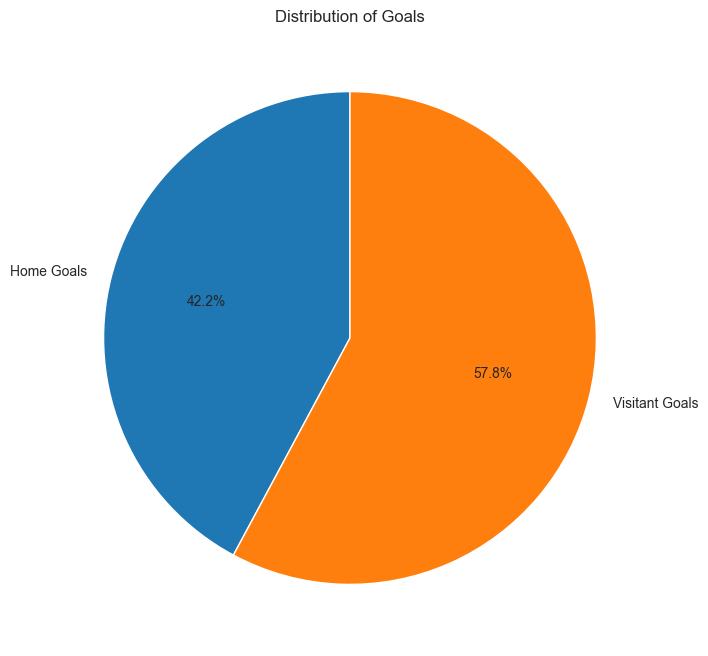

In [87]:
plt.figure(figsize=(8, 8))
plt.pie([total_away_goals['Total_Goal_Home'].values[0], total_away_goals['Total_Goal_Away'].values[0]], labels=['Home Goals', 'Visitant Goals'], autopct='%1.1f%%', startangle=90)
plt.title('Distribution of Goals')
plt.show()

3. NUMBER OF NATIONAL PLAYERS OF THE TEAMS OF A CERTAIN COMPETITION

From the clubs dataFrame, we select the rows whose competition is the italian one (for example). After that, we select the columns that we need for the graphic, 'club_Code' and 'national_team_players', and we save it in a new dataFrame 'clubs_df2'.

In [88]:
clubs_df1 = clubs_df[(clubs_df['domestic_competition_id'] == 'IT1')]
clubs_df2 = clubs_df1[['club_code','national_team_players']]
clubs_df2

,club_code,national_team_players
3,as-rom,17
32,fc-bologna,13
47,udinese-calcio,8
78,palermo-fc,4
79,inter-mailand,19
100,spezia-calcio,11
111,ssc-neapel,16
116,parma-calcio-1913,6
117,cesena-fc,0
123,spal,2


As we don't need to modify more information, we draw the plot:

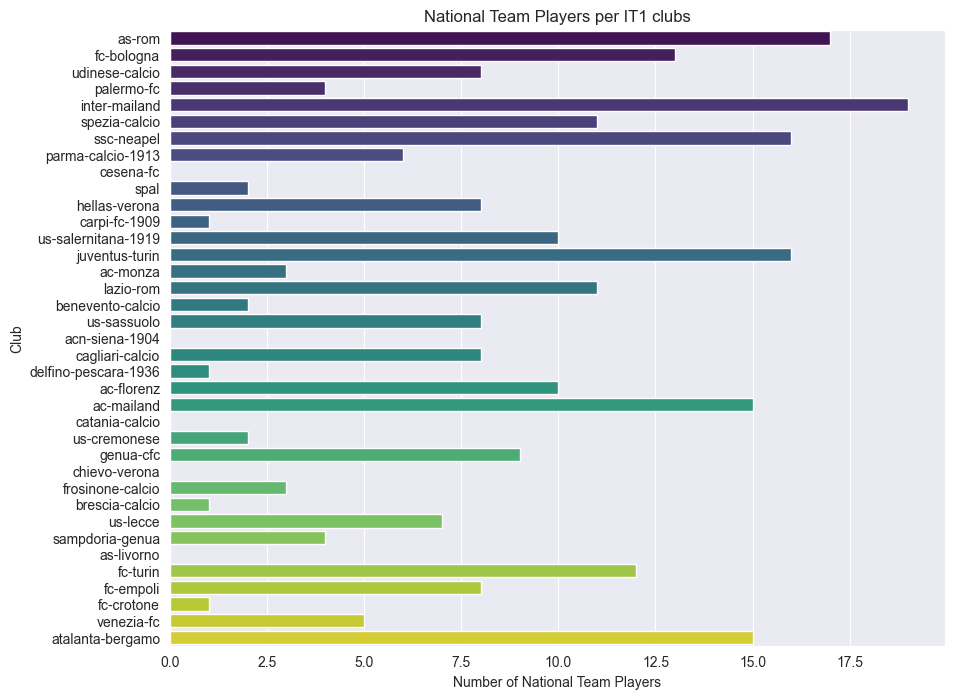

In [89]:
plt.figure(figsize=(10, 8))
sns.barplot(x='national_team_players', y='club_code', data=clubs_df2, palette='viridis')
plt.title('National Team Players per IT1 clubs')
plt.xlabel('Number of National Team Players')
plt.ylabel('Club')
plt.show()

4. THE MOST VALUABLE PLAYERS IN A COMPETICION

First we select from the player valuations dataframe the competition we want to get the most valuable players and we select the columns that are going to be useful(player_id, market_value_in_eur, and date).

In [90]:
dfValuePlayers = player_valuations_df[(player_valuations_df['player_club_domestic_competition_id'] == 'IT1')]
dfValuePlayers = dfValuePlayers[['player_id', 'market_value_in_eur', 'date']]

Then we order the data frame in a descending way by the market value and filter the data by getting only the players whose value is bigger that 50.000.000 and delete the duplicates players.

In [91]:
dfValuePlayers = dfValuePlayers.sort_values(by=['market_value_in_eur'], ascending=False)
dfValuePlayers = dfValuePlayers.query('market_value_in_eur > 50000000')
dfValuePlayers = dfValuePlayers.drop_duplicates(subset=['player_id'])

Then we get the name of the players from the player data frame and do a merge with our data frame by player_id. Finally, we modify the date colum tpo get only the year, and we order the data frame by the year.

In [92]:
dfValuePlayers = pd.merge(dfValuePlayers[['player_id','market_value_in_eur', 'date']], players_df[['player_id','name']], on='player_id', how='left')
dfValuePlayers['date'] = pd.to_datetime(dfValuePlayers['date']).dt.year
dfValuePlayers = dfValuePlayers.sort_values(by=['date'])
dfValuePlayers

,player_id,market_value_in_eur,date,name
13,3366,70000000,2007,Kaká
9,39153,75000000,2017,Gonzalo Higuaín
24,75615,55000000,2018,Douglas Costa
1,206050,110000000,2018,Paulo Dybala
4,266302,90000000,2018,Sergej Milinković-Savić
14,40433,70000000,2018,Alexis Sánchez
11,133964,75000000,2018,Lorenzo Insigne
20,257462,60000000,2019,Luka Jović
19,111196,60000000,2019,Stefan de Vrij
18,156617,60000000,2019,Marcelo Brozovic


We draw a bar graphic with the data frame.

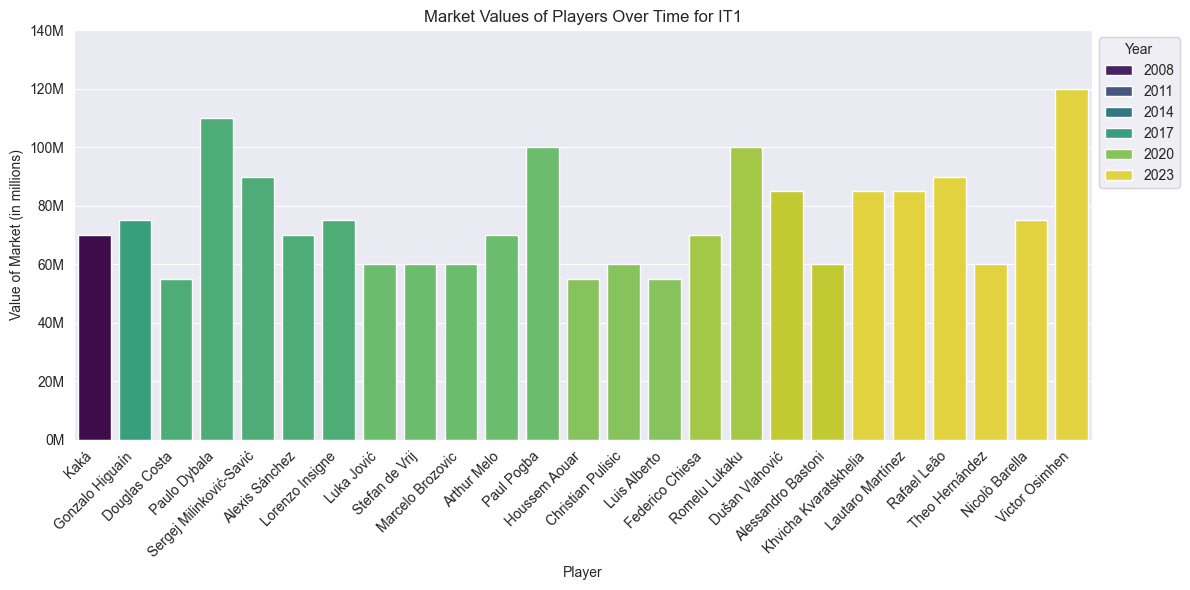

In [93]:
plt.figure(figsize=(12, 6))
sns.barplot(x='name', y='market_value_in_eur', hue='date', data=dfValuePlayers, palette='viridis', errorbar=None)

plt.xlabel('Player')
plt.ylabel('Value of Market (in millions)')
plt.title(f'Market Values of Players Over Time for IT1')
plt.legend(title='Year', loc='upper left', bbox_to_anchor=(1, 1))
plt.xticks(rotation=45, ha='right')

plt.yticks(plt.yticks()[0], [f'{round(y/1000000)}M' for y in plt.yticks()[0]])

plt.tight_layout()
plt.show()

5.PLAYERS THAT HAVE ONE OR MORE HATTRICKS IN A CERTAIN COMPETITION

From the dataFrame that represents the appearances of the players, we get the columns necessaries (player, goals and one competition to search in). Then, we select a certain competition and that information is saved in 'appearances_df2'. In this dataFrame, it will appear only for the competition selected, the player and the number of goals scored. As we're searching for hattricks, the column 'goals' will be 3 always. In this dataFrame it is not saved the number of hattricks per player, so we need to calculate it below.

In [94]:
appearances_df1 = appearances_df[['player_name','goals','competition_id']]
appearances_df2 = appearances_df1[(appearances_df1['goals'] == 3) & (appearances_df1['competition_id'] == 'ES1')]
appearances_df2

,player_name,goals,competition_id
12670,Radamel Falcao,3,ES1
27627,Cristiano Ronaldo,3,ES1
33899,Lionel Messi,3,ES1
72850,Xabi Prieto,3,ES1
80533,Cristiano Ronaldo,3,ES1
...,...,...,...
1431208,Karim Benzema,3,ES1
1440380,Lázaro,3,ES1
1480235,Luis Suárez,3,ES1
1486837,Antoine Griezmann,3,ES1


To calculate the number of hattricks per player, we create a new dataFrame, in which te column numHattricks will be a sum of the number of appearances of a certain player in the column 'player_name' using groupby.

In [95]:
players_numhattricks_df = pd.DataFrame()
players_numhattricks_df['player_name'] = appearances_df2['player_name']
players_numhattricks_df['numHattricks'] = 3
players_numhattricks_df = players_numhattricks_df.groupby('player_name', as_index=False)['numHattricks'].sum()
players_numhattricks_df

,player_name,numHattricks
0,Alexander Isak,3
1,Alexis Sánchez,3
2,Antoine Griezmann,9
3,Antonio Sanabria,6
4,Aritz Aduriz,9
5,Arnaut Danjuma,3
6,Carlos Bacca,6
7,Carlos Vela,3
8,Cesc Fàbregas,3
9,Charles,3


When we have the number of hattricks per player, now we can draw the graphic:

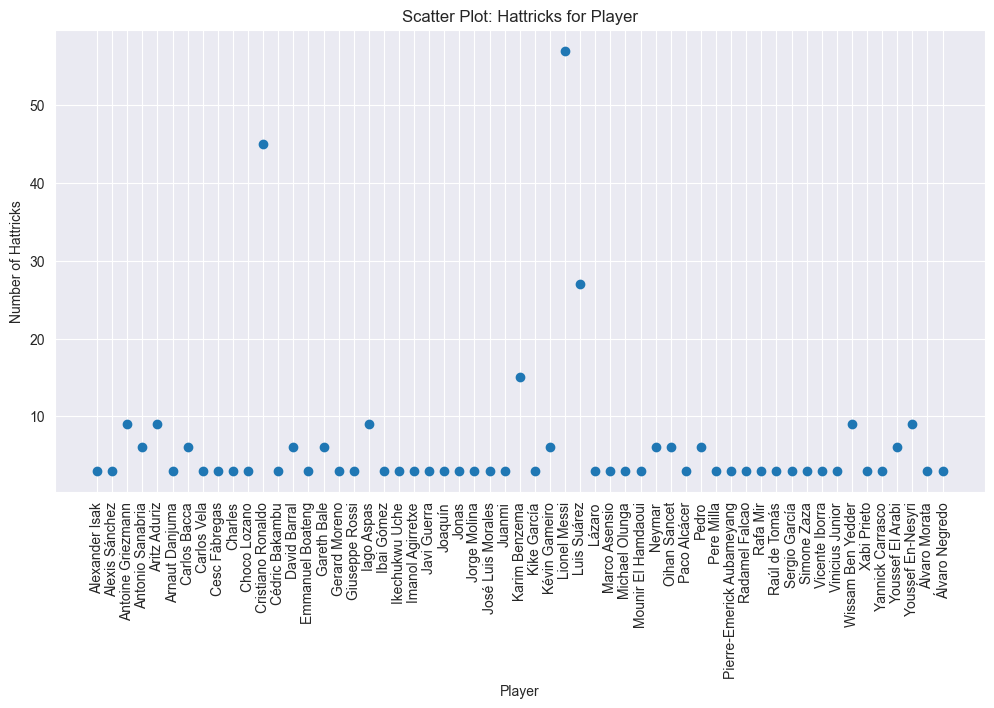

In [96]:
plt.figure(figsize=(12, 6))
plt.scatter(players_numhattricks_df['player_name'], players_numhattricks_df['numHattricks'])
plt.title('Scatter Plot: Hattricks for Player')
plt.xlabel('Player')
plt.ylabel('Number of Hattricks')
plt.xticks(rotation=90)
plt.show()

6. COMPARATIVE OF AVERAGE GOALS PER GAME OF EACH OF THE 5 BIG EUROPEAN LEAGUES SINCE A CERTAIN YEAR

We select the columns that we want from the games' dataFrame, and it is done an add between the home_goals and away_goals of each game that will be stored in the column 'total_goals'.

In [97]:
dfAverageGoalsBig5 = games_df[['competition_id', 'season', 'home_club_goals', 'away_club_goals']]
dfAverageGoalsBig5['total_goals'] = dfAverageGoalsBig5['home_club_goals'] + dfAverageGoalsBig5['away_club_goals']

Now, we select from the new dataFrame created in the cell above those rows whose competition is one of the big 5 european leagues.

In [98]:
competitions = ["ES1", "IT1", "GB1", "L1", "FR1"]
dfAverageGoalsBig5 = dfAverageGoalsBig5[dfAverageGoalsBig5['competition_id'].isin(competitions)]

Once we have the games for the five big leagues, we make a new data frame that count the games for a competition in a season, doing a groupby and creating the data frame dfAverageGoalsBig5Games.

In [99]:
dfAverageGoalsBig5Games = dfAverageGoalsBig5.groupby(['competition_id', 'season']).size().reset_index(name='games')

We do the same but instead of counting the games for competition and season we count the goals in each competition and season. We create dfAverageGoalsBig5Goals new data frame.

In [100]:
dfAverageGoalsBig5Goals = dfAverageGoalsBig5.groupby(['competition_id', 'season'])['total_goals'].sum().reset_index()

With the two new data frames we now do a merge between the two of them to have them in a single data frame. Then we create a new colum in that dat frame call it avg_goals in which we calculate the average of goals per season in each competition.

In [101]:
dfAverageGoalsBig5 = pd.merge(dfAverageGoalsBig5Games, dfAverageGoalsBig5Goals, on=['competition_id', 'season'], how='inner')
dfAverageGoalsBig5['avg_goals'] = round(dfAverageGoalsBig5['total_goals'] / dfAverageGoalsBig5['games'], 2)
dfAverageGoalsBig5

,competition_id,season,games,total_goals,avg_goals
0,ES1,2012,380,1091,2.87
1,ES1,2013,380,1045,2.75
2,ES1,2014,380,1009,2.66
3,ES1,2015,380,1043,2.74
4,ES1,2016,380,1118,2.94
5,ES1,2017,380,1024,2.69
6,ES1,2018,332,860,2.59
7,ES1,2019,380,942,2.48
8,ES1,2020,380,953,2.51
9,ES1,2021,379,949,2.50


Once we have the average goals per game for each of the big 5 leagues in the last years, it is possible then to draw the graphic.

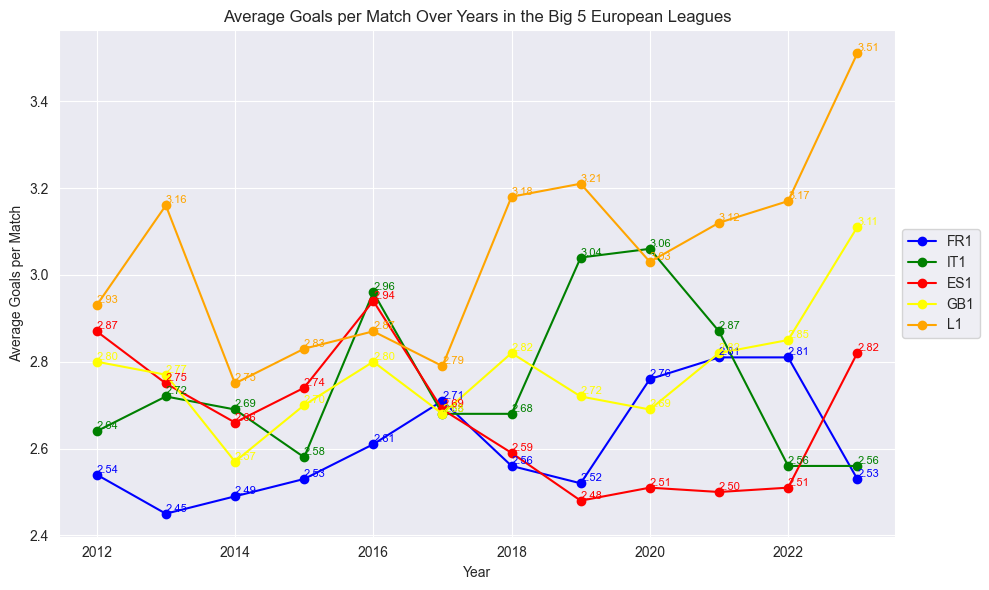

In [102]:
color_map = {'FR1': 'blue', 'IT1': 'green', 'ES1': 'red', 'GB1': 'yellow', 'L1': 'orange'}

plt.figure(figsize=(10, 6))

for competition_name, color in color_map.items():
    df_competition = dfAverageGoalsBig5[dfAverageGoalsBig5['competition_id'] == competition_name]
    plt.plot(df_competition['season'], df_competition['avg_goals'], label=competition_name, color=color, marker='o')
    for season, avg_goals in zip(df_competition['season'], df_competition['avg_goals']):
        plt.text(season, avg_goals, f'{avg_goals:.2f}', ha='left', va='bottom', fontsize=8, color=color)

plt.title('Average Goals per Match Over Years in the Big 5 European Leagues')
plt.xlabel('Year')
plt.ylabel('Average Goals per Match')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.grid(True)

plt.tight_layout()
plt.show()

7. GOAL EVOLUTION OF A PLAYER OVER THE YEARS

We get the dataFrames needed to get the information that we want, and the columns required for each of them.

In [103]:
dfEvolutionGoals = appearances_df[['game_id', 'player_id', 'goals']]
dfGamesFilter = games_df[['game_id', 'season']]

Now, we merge the two dataFrames of the cell above by the column 'game_id'.

In [104]:
dfEvolutionGoals = pd.merge(dfEvolutionGoals, dfGamesFilter, on='game_id', how='inner')

Now we look for the player that we want to see. With his id, we get the count of goals per player per season (groupby).

In [105]:
dfEvolutionGoals = dfEvolutionGoals.query('player_id == 28003')
dfEvolutionGoals = dfEvolutionGoals.groupby(['player_id', 'season'])['goals'].sum().reset_index()
#In the next code lines, we get the name of the player:
dfPlayer = players_df[['player_id', 'name']].query('player_id == 28003')
dfEvolutionGoals = pd.merge(dfEvolutionGoals, dfPlayer, on='player_id', how='inner')
dfEvolutionGoals

,player_id,season,goals,name
0,28003,2012,60,Lionel Messi
1,28003,2013,41,Lionel Messi
2,28003,2014,58,Lionel Messi
3,28003,2015,41,Lionel Messi
4,28003,2016,54,Lionel Messi
5,28003,2017,45,Lionel Messi
6,28003,2018,43,Lionel Messi
7,28003,2019,31,Lionel Messi
8,28003,2020,38,Lionel Messi
9,28003,2021,11,Lionel Messi


Now, the drawing of the graphic:

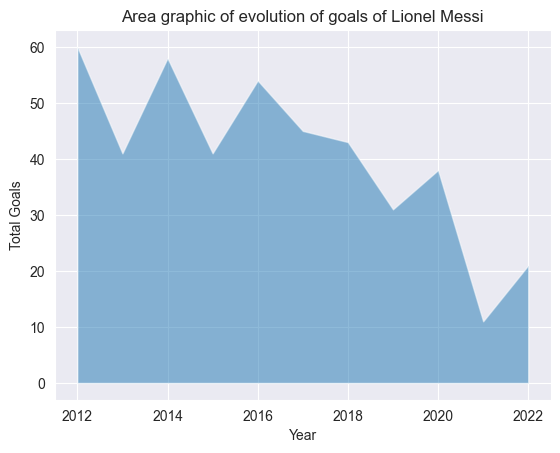

In [106]:
plt.fill_between(dfEvolutionGoals['season'], 0, dfEvolutionGoals['goals'], alpha=0.5)

plt.title(f'Area graphic of evolution of goals of {dfEvolutionGoals['name'][0]}')
plt.xlabel('Year')
plt.ylabel('Total Goals')
plt.grid(True)

plt.show()

8. FOR A GIVEN TEAM NAME THE PERCENTAGE OF EACH NATIONALITY OF HIS PLAYERS

What we do in the next cell is to merge the clubs' dataFrame (only club_id and name columns) with 'dfPlayerTeam', a new dataFrame that represents from all the players their country of citizenship and their current club. After this, we choose the club from which we want to see the nationalities of their players.

In [107]:
dfPlayerTeam = players_df[['country_of_citizenship', 'current_club_id']].rename(columns={'current_club_id': 'club_id'})
dfPlayerTeam = pd.merge(dfPlayerTeam[['country_of_citizenship', 'club_id']], clubs_df[['club_id','name']], on='club_id', how='left')
dfPlayerTeam = dfPlayerTeam[['name', 'country_of_citizenship']]
dfPlayerTeam = dfPlayerTeam.query('name == "Real Madrid Club de Fútbol"')
dfPlayerTeam

,name,country_of_citizenship
72,Real Madrid Club de Fútbol,France
254,Real Madrid Club de Fútbol,Austria
342,Real Madrid Club de Fútbol,Germany
1249,Real Madrid Club de Fútbol,Spain
1999,Real Madrid Club de Fútbol,Belgium
3042,Real Madrid Club de Fútbol,Spain
3216,Real Madrid Club de Fútbol,Spain
4388,Real Madrid Club de Fútbol,Spain
4424,Real Madrid Club de Fútbol,Spain
5038,Real Madrid Club de Fútbol,France


Now, we group the dataframe by the number of appearances of each country of citizenship, as we reset that index to 'total_players'. Next, we change the name of Wales and England to United Kingdom so that they can be seen in the graphic. Last, we count the number of players from a certain country applying the operation 'sum' on the 'total_players' column.

In [108]:
dfPlayerTeam = dfPlayerTeam.groupby('country_of_citizenship').size().reset_index(name='total_players').sort_values(by='total_players', ascending=False)
dfPlayerTeam['country_of_citizenship'].replace(['Wales', 'England'], 'United Kingdom', inplace=True)
dfPlayerTeam = dfPlayerTeam.groupby('country_of_citizenship')['total_players'].sum().reset_index()
dfPlayerTeam

,country_of_citizenship,total_players
0,Argentina,2
1,Austria,1
2,Belgium,2
3,Brazil,4
4,Croatia,1
5,Dominican Republic,2
6,France,4
7,Germany,2
8,Spain,23
9,Turkey,1


Function that given a players nationalities and a team draw a pie graphic of the percentage of each nationality in the team

In [109]:
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))

merged = world.merge(dfPlayerTeam, left_on='name', right_on='country_of_citizenship')

fig = px.choropleth(
    merged,
    geojson=merged.geometry,
    locations=merged.index,
    color='total_players',
    color_continuous_scale='Viridis',
    hover_name='name',
    projection='natural earth',
    title='Real Madrid`s squad players per nationality'
)

fig.update_geos(showcoastlines=True, coastlinecolor='white', showland=True, landcolor='white')
fig.update_layout(margin=dict(l=0, r=0, b=0, t=50))

fig.show()

9. AGE DENSITY FOR EACH POSITION

In the next cell we get the columns 'position', 'last_season' and 'date_of_birth' from the players' dataFrame. Then, we calculate the age of each players based on the year of the date of birth and the year of their last season.

In [110]:
dfPlayerPositionAge = players_df[['position', 'last_season', 'date_of_birth']]
dfPlayerPositionAge['date_of_birth'] = dfPlayerPositionAge['date_of_birth'].dt.year.astype('Int64')
dfPlayerPositionAge['age'] = dfPlayerPositionAge["last_season"] - dfPlayerPositionAge['date_of_birth']

Also, we get from the new dataFrame those rows whose column 'position' has a not null value:

In [111]:
dfPlayerPositionAge = dfPlayerPositionAge.query('position != "Missing"')
dfPlayerPositionAge

,position,last_season,date_of_birth,age
0,Goalkeeper,2014,1979,35
1,Attack,2012,1979,33
2,Defender,2012,1982,30
3,Attack,2013,1983,30
4,Midfield,2013,1979,34
...,...,...,...,...
30297,Defender,2023,1999,24
30298,Goalkeeper,2018,2001,17
30299,Midfield,2023,2002,21
30300,Defender,2022,2003,19


Now, we use the previous dataFrame to draw the violin graphic:

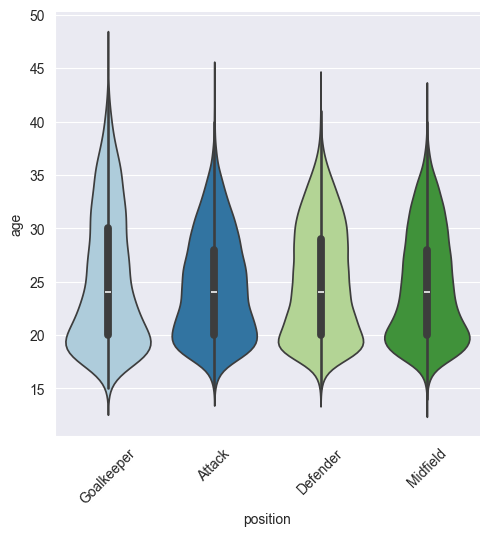

In [112]:
violin = sns.catplot(x='position', y='age', data=dfPlayerPositionAge, kind='violin', palette='Paired')
violin.set_xticklabels(rotation=45)
plt.show()

10. EVOLUTION OF THE ATTENDANCE TO A CLUB STATION IN A YEAR

We get from the games' dataFrame the information necessary to visualize the attendance to the matches of the home_club that we want to analyze. We also include the away_club_name because it can be a reason of why there is more or less attendance.

In [113]:
games_df1 = games_df[['season','home_club_name', 'attendance', 'away_club_name']]
games_df1

,season,home_club_name,attendance,away_club_name
0,2012,RFK Akhmat Grozny,21700.0,FK Spartak Moskva
1,2012,PFK Krylya Sovetov Samara,11400.0,Amkar Perm
2,2012,PFK CSKA Moskva,12000.0,FK Dinamo Moskva
3,2012,"Футбольный клуб ""Локомотив"" Москва",11408.0,FC Rubin Kazan
4,2012,PFK Krylya Sovetov Samara,7534.0,Volga Nizhniy Novgorod (- 2016)
...,...,...,...,...
65211,2013,Eindhovense Voetbalvereniging Philips Sport Ve...,10000.0,NaN
65212,2015,Eindhovense Voetbalvereniging Philips Sport Ve...,31000.0,NaN
65213,2018,Eindhovense Voetbalvereniging Philips Sport Ve...,34200.0,NaN
65214,2023,Stoke City,9410.0,NaN


Now, we query the dataFrame by choosing the club and the year in which we want to see the evolution in the attendance to the different games.

In [114]:
games_df2 = games_df1[(games_df1['season'] == 2012) & (games_df1['home_club_name'] == 'Borussia Dortmund')]
games_df2

,season,home_club_name,attendance,away_club_name
101,2012,Borussia Dortmund,80645.0,TSG 1899 Hoffenheim Fußball-Spielbetriebs GmbH
169,2012,Borussia Dortmund,65829.0,AFC Ajax Amsterdam
1184,2012,Borussia Dortmund,65829.0,Real Madrid Club de Fútbol
10390,2012,Borussia Dortmund,80645.0,Borussia Verein für Leibesübungen 1900 Mönchen...
10402,2012,Borussia Dortmund,80645.0,Hannover 96
14367,2012,Borussia Dortmund,80645.0,Verein für Bewegungsspiele Stuttgart 1893
21485,2012,Borussia Dortmund,80645.0,Hamburger SV
21490,2012,Borussia Dortmund,80400.0,FC Augsburg 1907
25137,2012,Borussia Dortmund,80645.0,Verein für Leibesübungen Wolfsburg
25141,2012,Borussia Dortmund,80645.0,1. Fußball- und Sportverein Mainz 05


Last, we visualize the data:

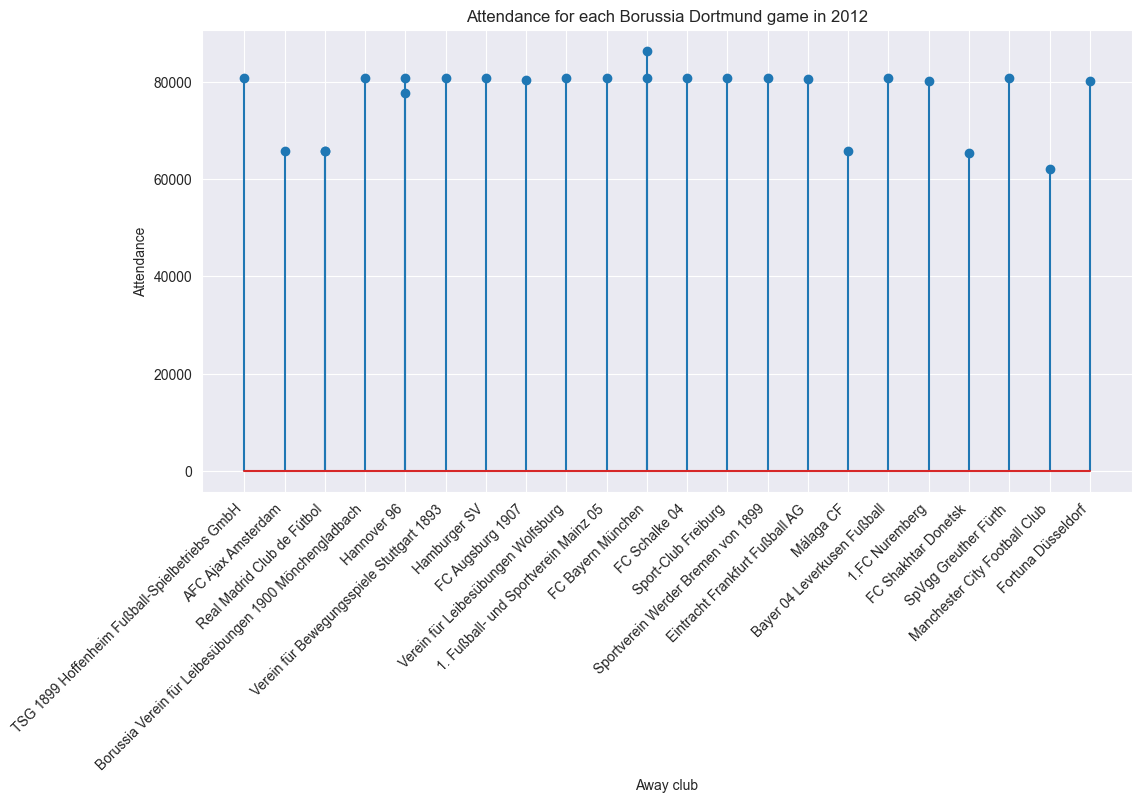

In [115]:
plt.figure(figsize=(12, 6))
plt.stem(games_df2['away_club_name'], games_df2['attendance'])
plt.title('Attendance for each Borussia Dortmund game in 2012')
plt.xlabel('Away club')
plt.ylabel('Attendance')
plt.xticks(rotation=45, ha='right')
plt.show()

11. RELATION OF THE COUNTRY OF BIRTH AND THE NUMBER OF CARDS OF THE PLAYER

We get the game events of the cards with the player id and filter the description to only let yellow for a yellow card and red for red cards. It does that by creating a mask of the rows if it matches the yellow or red word in the description in an insensitive way, then update the colum of each row using the loc and the previously created mask.

In [116]:
dfCards = game_events_df[['player_id', 'type', 'description']]
dfCards = dfCards.query('type == "Cards"')
mask_yellow = dfCards['description'].str.contains('yellow', case=False)
mask_red = dfCards['description'].str.contains('red', case=False)
dfCards.loc[mask_yellow, 'description'] = 'yellow'
dfCards.loc[mask_red, 'description'] = 'red'
dfCards

,player_id,type,description
0,4425,Cards,yellow
1,33210,Cards,yellow
6,42710,Cards,yellow
8,45509,Cards,yellow
12,68864,Cards,yellow
...,...,...,...
666534,201570,Cards,yellow
666536,369561,Cards,yellow
666538,744754,Cards,yellow
666539,129558,Cards,yellow


We get the players that have more than 10 games played

In [117]:
dfGamesPlayed = appearances_df[['player_id']]
dfPlayed = dfGamesPlayed['player_id'].value_counts()
dfPlayed = dfPlayed.rename('number_of_games')
dfPlayer = pd.DataFrame({'player_id': dfPlayed.index, 'number_of_games': dfPlayed.values})
dfGamesPlayed = dfGamesPlayed.drop_duplicates()
dfGamesPlayed = pd.merge(dfGamesPlayed, dfPlayed, on='player_id', how='left')
dfGamesPlayed = dfGamesPlayed[dfGamesPlayed['number_of_games'] > 10]
dfGamesPlayed

,player_id,number_of_games
0,38004,66
3,73333,45
4,122011,165
5,146889,292
6,28716,11
...,...,...
23638,452477,14
23672,534909,12
23675,735568,12
23676,1061282,12


We get the players name, id and country of birth. Then we get the player that have more than 10 games

In [118]:
dfBirth = players_df[['player_id', 'name', 'country_of_birth']]
dfBirth = pd.merge(dfBirth, dfGamesPlayed, on='player_id', how='right')
dfBirth['country_of_birth'].replace(['Wales', 'England'], 'United Kingdom', inplace=True)
#dfBirth = dfBirth.groupby('country_of_birth')['number_of_games'].sum().reset_index()
dfBirth

,player_id,name,country_of_birth,number_of_games
0,38004,Aurélien Joachim,Belgium,66
1,73333,Vegar Hedenstad,Norway,45
2,122011,Markus Henriksen,Norway,165
3,146889,Peter Ankersen,Denmark,292
4,28716,Adi Adilovic,Jugoslawien (SFR),11
...,...,...,...,...
16764,452477,Junior Adamu,Nigeria,14
16765,534909,Guillermo Soto,Chile,12
16766,735568,Natan,Brazil,12
16767,1061282,Assane Diao,Senegal,12


We get the total player for country

In [119]:
dfPlayersPerCountry = dfBirth['country_of_birth'].value_counts()
dfPlayersPerCountry

country_of_birth
France            1319
Spain             1058
Brazil            1039
United Kingdom     911
Netherlands        838
                  ... 
Pakistan             1
Turkmenistan         1
Crimea               1
Nicaragua            1
Jersey               1
Name: count, Length: 165, dtype: int64

We do a merge of the two data frames by the player id

In [120]:
dfBirthCards = pd.merge(dfCards, dfBirth, on='player_id', how='left')
dfBirthCards

,player_id,type,description,name,country_of_birth,number_of_games
0,4425,Cards,yellow,Theo Janssen,Netherlands,46.0
1,33210,Cards,yellow,Przemyslaw Tyton,Poland,105.0
2,42710,Cards,yellow,Toby Alderweireld,Belgium,383.0
3,45509,Cards,yellow,Siem de Jong,Switzerland,205.0
4,68864,Cards,yellow,Kevin Strootman,Netherlands,285.0
...,...,...,...,...,...,...
62468,201570,Cards,yellow,NaN,NaN,NaN
62469,369561,Cards,yellow,NaN,NaN,NaN
62470,744754,Cards,yellow,NaN,NaN,NaN
62471,129558,Cards,yellow,Sam Walker,United Kingdom,25.0


We create two data frames one for yellow and other for red cards to count each card. We count the number of yellow and red cards for country. The red card count as 2

In [121]:
dfYellow_cards = dfBirthCards[dfBirthCards['description'] == 'yellow']
dfRed_cards = dfBirthCards[dfBirthCards['description'] == 'red']
dfYellow_cards = dfYellow_cards.groupby('country_of_birth').size()
dfRed_cards = dfRed_cards.groupby('country_of_birth').size() * 2

We put the two counts together in a data frame and add the number of people per country

In [122]:
dfBirthCardsTotal = pd.DataFrame({'yellow_cards': dfYellow_cards, 'red_cards': dfRed_cards}).fillna(0)
dfBirthCardsTotal['total_points'] = dfBirthCardsTotal['yellow_cards'] + dfBirthCardsTotal['red_cards'].astype(int)
dfBirthCardsTotal['player_per_country'] = dfBirthCardsTotal.index.map(dfPlayersPerCountry)
dfBirthCardsTotal

,yellow_cards,red_cards,total_points,player_per_country
country_of_birth,,,,
Albania,160,6.0,166,33
Algeria,67,10.0,77,27
Angola,98,4.0,102,34
Argentina,1772,90.0,1862,438
Armenia,10,0.0,10,7
...,...,...,...,...
Venezuela,127,6.0,133,50
Yugoslavia (Republic),203,12.0,215,138
Zaire,186,12.0,198,51


We get for each country the point of cards per country, but we only count the countries that have more than 10 players. Also, it is important to mention that we only took in account the player who have more than 10 games.

In [123]:
dfBirthCardsTotal = dfBirthCardsTotal[dfBirthCardsTotal['player_per_country'] > 10]
dfBirthCardsTotal['points_per_country'] = round(dfBirthCardsTotal['total_points'] / dfBirthCardsTotal['player_per_country'], 2)
dfBirthCardsTotal = dfBirthCardsTotal.sort_values(by='points_per_country', ascending=False)
dfBirthCardsTotal

,yellow_cards,red_cards,total_points,player_per_country,points_per_country
country_of_birth,,,,,
Chile,310,22.0,332,50,6.64
Jugoslawien (SFR),1802,108.0,1910,377,5.07
Albania,160,6.0,166,33,5.03
East Germany (GDR),109,2.0,111,23,4.83
UdSSR,3057,182.0,3239,718,4.51
...,...,...,...,...,...
Moldova,9,2.0,11,13,0.85
Sierra Leone,13,0.0,13,16,0.81
Luxembourg,9,0.0,9,12,0.75


We draw in a map for the countries in the data frame equitably of the number of player per country

In [124]:
dfBirthCardsTotal = dfBirthCardsTotal[['points_per_country']]
dfBirthCardsTotal = dfBirthCardsTotal.reset_index()
dfBirthCardsTotal

,country_of_birth,points_per_country
0,Chile,6.64
1,Jugoslawien (SFR),5.07
2,Albania,5.03
3,East Germany (GDR),4.83
4,UdSSR,4.51
...,...,...
84,Moldova,0.85
85,Sierra Leone,0.81
86,Luxembourg,0.75
87,Belarus,0.74


In [125]:
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))

merged = world.merge(dfBirthCardsTotal, how='left', left_on='name', right_on='country_of_birth')

merged['points_per_country'] = merged['points_per_country'].fillna(0)

fig = px.choropleth(
    merged,
    geojson=merged.geometry,
    locations=merged.index,
    color='points_per_country',
    color_continuous_scale='Viridis',
    hover_name='name',
    projection='natural earth',
    title='Mondial map of cards per country'
)

fig.update_geos(showcoastlines=True, coastlinecolor='white', showland=True, landcolor='white')
fig.update_layout(margin=dict(l=0, r=0, b=0, t=50))

fig.show()

12. NUMBER OF PLAYERS BY THE PERCENTAGE OF SUBSTITUTE GOALS ABOUT THEIR TOTAL GOALS

Recover the game events about substitutions, in specific we want the player who comes to the game from the bench. 
We delete the rows with NaN data un player_in_id. 
We change the type of the column to match int64.

In [126]:
dfSubstitutions = game_events_df.loc[game_events_df['type'] == 'Substitutions', ['player_in_id', 'game_id', 'type', 'minute']]
dfSubstitutions = dfSubstitutions.dropna(subset=['player_in_id'])
dfSubstitutions['player_in_id'] = dfSubstitutions['player_in_id'].astype('int64')
dfSubstitutions

,player_in_id,game_id,type,minute
4,49499,2211607,Substitutions,74
10,182932,2211607,Substitutions,76
13,167850,2211607,Substitutions,84
14,34784,2211607,Substitutions,65
17,111184,2211607,Substitutions,76
...,...,...,...,...
666550,550816,4228114,Substitutions,59
666551,1203716,4228114,Substitutions,63
666553,965607,4228114,Substitutions,82
666555,1200869,4228114,Substitutions,68


We get goals events

In [127]:
dfGoals = game_events_df[['player_id', 'game_id', 'type', 'minute']]
dfGoals = dfGoals.query('type == "Goals"')
dfGoals

,player_id,game_id,type,minute
2,36500,2211607,Goals,3
3,36500,2211607,Goals,53
5,38497,2211607,Goals,11
7,42710,2211607,Goals,44
9,49499,2211607,Goals,90
...,...,...,...,...
666546,479987,4228114,Goals,51
666549,747267,4228114,Goals,77
666552,874064,4228114,Goals,49
666554,922572,4228114,Goals,44


We get the total goals for each player

In [128]:
dfGoalsTotalForPlayer = dfGoals.groupby('player_id')['game_id'].count().reset_index(name='total_goals')
dfGoalsTotalForPlayer

,player_id,total_goals
0,10,48
1,65,38
2,109,1
3,132,9
4,205,2
...,...,...
26999,1199194,1
27000,1200032,1
27001,1202692,1
27002,1203715,1


We merge the dfSubstitutions and dfGoals to get the goals of the players that score in a game coming from the bench

In [129]:
dfSubstitutions = dfSubstitutions.rename(columns={'player_in_id': 'player_id'})
dfSubstitutionsGoals = pd.merge(dfGoals, dfSubstitutions, on=['player_id', 'game_id'], how='outer')
dfSubstitutionsGoals = dfSubstitutionsGoals.dropna(subset=['type_x', 'type_y'], how='any')
dfSubstitutionsGoals = dfSubstitutionsGoals.query('minute_x > minute_y')
dfSubstitutionsGoals

,player_id,game_id,type_x,minute_x,type_y,minute_y
24,10,2359290,Goals,52.0,Substitutions,46.0
32,10,2385105,Goals,82.0,Substitutions,71.0
36,10,2478662,Goals,60.0,Substitutions,46.0
48,10,2478832,Goals,70.0,Substitutions,65.0
55,10,2478963,Goals,90.0,Substitutions,77.0
...,...,...,...,...,...,...
579661,1196408,4115636,Goals,69.0,Substitutions,46.0
579662,1196408,4115636,Goals,84.0,Substitutions,46.0
579668,1198379,4188967,Goals,87.0,Substitutions,71.0
579722,1203715,4228114,Goals,85.0,Substitutions,82.0


We get the total goals for each player scored from bench.

In [130]:
dfSubstitutionsGoalsTotal = dfSubstitutionsGoals[dfSubstitutionsGoals['type_y'] == 'Substitutions']
dfSubstitutionsGoalsTotal = dfSubstitutionsGoalsTotal.groupby('player_id')['game_id'].count().reset_index(name='total_goals_subs')
dfSubstitutionsGoalsTotal

,player_id,total_goals_subs
0,10,7
1,65,3
2,132,1
3,215,7
4,410,1
...,...,...
9764,1195000,1
9765,1196408,4
9766,1198379,1
9767,1203715,1


We create a new data frame dfMergedGoalSubs that combine for a player, their total goals and the bench goals. Then with that df we create a new colum of the percentage of those bench goals of the total goals.

In [131]:
dfMergedGoalSubs = pd.merge(dfSubstitutionsGoalsTotal, dfGoalsTotalForPlayer, on='player_id', how='outer')
dfMergedGoalSubs['total_goals_subs'] = dfMergedGoalSubs['total_goals_subs'].fillna(0)
dfMergedGoalSubs['total_goals_subs'] = dfMergedGoalSubs['total_goals_subs'].astype('int64')
dfMergedGoalSubs['percentage_total_goals_subs'] = round((dfMergedGoalSubs['total_goals_subs'] / dfMergedGoalSubs['total_goals']) * 100, 0)
dfMergedGoalSubs

,player_id,total_goals_subs,total_goals,percentage_total_goals_subs
0,10,7,48,15.0
1,65,3,38,8.0
2,109,0,1,0.0
3,132,1,9,11.0
4,205,0,2,0.0
...,...,...,...,...
26999,1199194,0,1,0.0
27000,1200032,0,1,0.0
27001,1202692,0,1,0.0
27002,1203715,1,1,100.0


We do a group by the percentage_total_goals_subs and count for each percentage the number of players. 
Also for each percentage we find the average goals of the player in each percentage,

In [132]:
grouped_df = dfMergedGoalSubs.groupby('percentage_total_goals_subs').agg(
    players_count=pd.NamedAgg(column='player_id', aggfunc='count'),
    avg_goals=pd.NamedAgg(column='total_goals', aggfunc='mean')
).reset_index()

grouped_df['avg_goals'] = round(grouped_df['avg_goals'], 0)
grouped_df

,percentage_total_goals_subs,players_count,avg_goals
0,0.0,17235,3.0
1,1.0,10,118.0
2,2.0,36,56.0
3,3.0,82,57.0
4,4.0,116,49.0
...,...,...,...
66,78.0,1,9.0
67,80.0,19,6.0
68,83.0,8,6.0
69,89.0,1,9.0


We graph in a bar graphic the number of players by percentage and for each percentage the average goals.

In [133]:
fig = px.bar(grouped_df, 
             x='percentage_total_goals_subs', 
             y='players_count',  
             title="Number of PLAYERS by the PERCENTAGE of SUBSTITUTE GOALS about their TOTAL GOALS",
             labels={'percentage_total_goals_subs': "Bench Goal Percentage", 'players_count': 'Number of Players'},
             color_discrete_sequence=['yellow'],    
             template='plotly',
             log_y=True,
             hover_data={'percentage_total_goals_subs': True, 'players_count': True, 'avg_goals': True}
             )

fig.update_traces(
    hovertemplate='<br>Bench Goal Percentage: %{x:.2f}%<br>Number of Players: %{y}<br>Average Goals: %{customdata[0]:.2f}',
)

fig.update_layout(
    xaxis_title='Bench Goal Percentage',
    yaxis_title='Number of Players',
)

fig.show()